<a href="https://colab.research.google.com/github/Seo-Hongju/Hong_test_git01/blob/master/kmeans1_lec_%EC%84%9C%ED%99%8D%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 임포트 하기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# 데이터 불러오기
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=200, n_features=2,
                 centers=4, cluster_std=1.8, random_state=101)

In [0]:
data[0][:10]

array([[ -6.42884095,  10.14111739],
       [  5.86867888,   5.20110356],
       [ -0.37610937,   3.26427943],
       [  2.16679181,   9.56300522],
       [  5.0950857 ,   7.20752718],
       [-10.87888819,  -6.1131804 ],
       [  2.03405554,   9.76664755],
       [ -1.71798771,   1.4140114 ],
       [  1.16911341,   8.24556988],
       [ -1.35185444,   3.13245345]])

In [0]:
data[1][:10]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0])

In [0]:
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters=4)

In [0]:
km.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
km.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3], dtype=int32)

In [0]:
km.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [0]:
## SSE 방식 적용

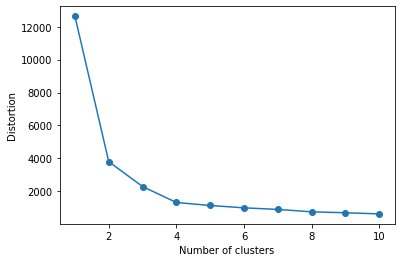

In [0]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(data[0])
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [0]:
### 꺾이는 선(엘보우)이 가장 전처리하기 좋은 군집화의 갯수라 한다.

### 이 결과로 2개에서 4개 사이가 가장 좋은 결과치라 생각된다.

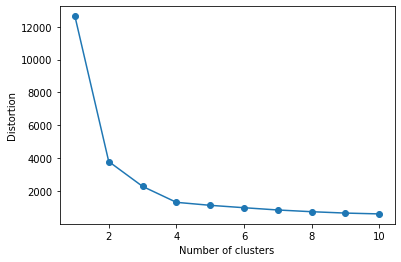

In [0]:
# k-means
distortions = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmeans.fit(data[0])
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [0]:
# 앞과 비슷한 결과

In [0]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

silhouette_samples_target = silhouette_samples(data[0], data[1])
silhouette_values = pd.DataFrame([data[1], silhouette_samples_target], index=['train_target', 'silhouette_target']).T
silhouette_values.head() #개별(silhouette_values) 확인 시 음수는 분류가 잘못되었다고 볼 수 있음.

,train_target,silhouette_target
0,3.0,0.615980
1,2.0,0.480215
2,0.0,0.542287
3,2.0,0.436429
4,2.0,0.630566


In [0]:
silhouette_values.groupby('train_target')['silhouette_target'].mean()

train_target
0.0    0.448528
1.0    0.747028
2.0    0.437386
3.0    0.477977
Name: silhouette_target, dtype: float64